In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# 1. Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()

In [3]:
X = cancer.data  # Features: 569 samples, 30 features
y = cancer.target # Labels: 569 samples, 2 classes (malignant or benign)

In [4]:
# 2. Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# 3. Create and train the SVM model (Linear Kernel)
svm = SVC(kernel='linear', C=1.0)  # Linear Kernel
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# 4. Predict on the test set
y_pred = svm.predict(X_test)

In [7]:
# 5. Evaluate the model’s performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.61%


In [8]:
# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [11]:
cm = confusion_matrix(y_test, y_pred)

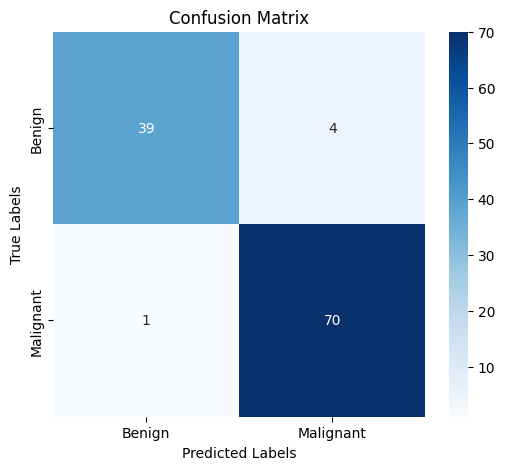

In [12]:
# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
# 7. Plot SVM Decision Boundary
# Reduce the dataset to two dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [14]:
# Split the reduced dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [15]:
# Train the SVM on the 2D data
svm_pca = SVC(kernel='linear', C=1.0)
svm_pca.fit(X_train_pca, y_train_pca)

SVC(kernel='linear')

In [16]:
# Create a mesh grid for decision boundary plot
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100))

In [17]:
# Predict class labels for each point in the mesh grid
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-18-5cfb8bfa799d>:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, marker='x', edgecolor='k', cmap=plt.cm.coolwarm, label="Test Data")


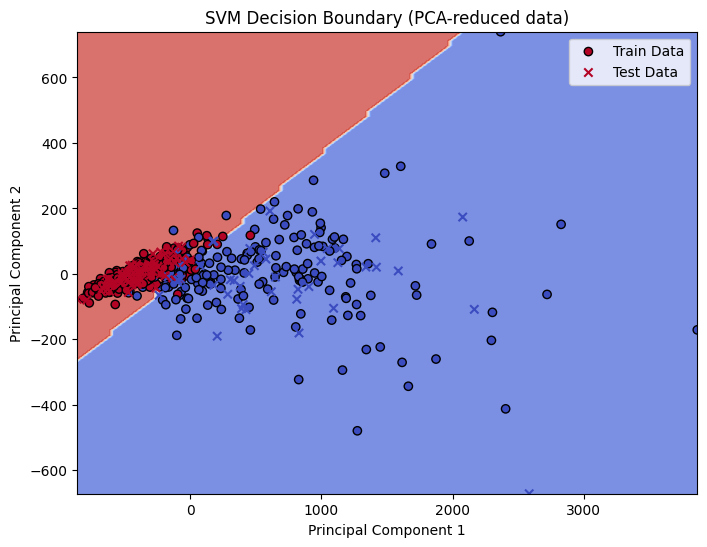

In [18]:
# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, marker='o', edgecolor='k', cmap=plt.cm.coolwarm, label="Train Data")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, marker='x', edgecolor='k', cmap=plt.cm.coolwarm, label="Test Data")
plt.title('SVM Decision Boundary (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()